In [2]:
#Imports
from tcn import TCN, tcn_full_summary
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
train_data = pd.read_csv('2022-09-26-18-56-30-joint_states.csv')
train_data['.position'] = train_data['.position'].str.strip('()')
train_data['.velocity'] = train_data['.velocity'].str.strip('()')
train_data['.effort'] = train_data['.effort'].str.strip('()')
time_stamp = train_data[['.header.stamp.nsecs']]
position = train_data['.position'].str.split(',', expand=True)
velocity = train_data['.velocity'].str.split(',', expand=True)
effort = train_data['.effort'].str.split(',', expand=True)
features = pd.concat([position, velocity, effort], axis=1)

In [6]:
x = features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled)

In [7]:
features.head()

0         1         2        3         4         5         6   \
0  0.650313  0.529148  0.489321  0.64699  0.504919  0.510995  0.746495   
1  0.650313  0.529160  0.489321  0.64699  0.504908  0.510995  0.746494   
2  0.650313  0.529172  0.489321  0.64699  0.504898  0.510995  0.746494   
3  0.650313  0.529184  0.489321  0.64699  0.504887  0.510994  0.746494   
4  0.650312  0.529196  0.489321  0.64699  0.504876  0.510994  0.746494   

         7         8         9   ...       26        27        28        29  \
0  0.496418  0.444459  0.724485  ...  0.37337  0.596550  0.758801  0.337569   
1  0.496435  0.444459  0.724485  ...  0.37337  0.596550  0.758815  0.337569   
2  0.496452  0.444459  0.724485  ...  0.37337  0.596551  0.758830  0.337569   
3  0.496469  0.444459  0.724484  ...  0.37337  0.596551  0.758845  0.337569   
4  0.496486  0.444459  0.724484  ...  0.37337  0.596551  0.758859  0.337569   

         30        31        32        33        34        35  
0  0.550196  0.363930  0.551238  0.570475  0.573869  0.519977  
1  0.550197  0.363915  0.551238  0.570476  0.573900  0.519977  
2  0.550197  0.363899  0.551238  0.570476  0.573931  0.519977  
3  0.550197  0.363884  0.551238  0.570476  0.573962  0.519977  
4  0.550197  0.363868  0.551238  0.570476  0.573994  0.519977  

[5 rows x 36 columns]

In [8]:
n_features = features.shape[-1]

In [6]:
# define the keras MLP model for x
from tcn import TCN, tcn_full_summary
model = Sequential()
model.add(TCN(input_shape=(1, n_features), nb_filters=32, return_sequences=False, dilations=[1, 2, 4, 8], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(36, input_dim=n_features, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(72, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(144, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(72, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(36, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(18, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(9, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
# compile the keras model
model.compile(loss='mse', optimizer='adam')

In [9]:
groundTruth = pd.read_csv("2022-09-26-18-56-30-ground_truth-state.csv", sep =',', nrows = 3750)
Xtargets = groundTruth[['.pose.pose.position.x']]
Ytargets = groundTruth[['.pose.pose.position.y']]

In [10]:
x = Xtargets.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Xtargets = pd.DataFrame(x_scaled)

In [11]:
x = Ytargets.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Ytargets = pd.DataFrame(x_scaled)

In [12]:
Xtargets = np.asarray(Xtargets).astype(np.float64)
Ytargets = np.asarray(Ytargets).astype(np.float64)

In [13]:
features = np.asarray(features).astype(np.float64)

In [14]:
features.shape

(3750, 36)

In [13]:
n_features = features.shape[-1]

In [14]:
features = features.reshape(-1, 1, n_features)

In [15]:
model.fit(features, Xtargets, epochs=30000, batch_size=1024, verbose=2)

Epoch 1/30000
4/4 - 1s - loss: 0.1407 - 953ms/epoch - 238ms/step
Epoch 2/30000
4/4 - 0s - loss: 0.0330 - 96ms/epoch - 24ms/step
Epoch 3/30000
4/4 - 0s - loss: 0.0317 - 92ms/epoch - 23ms/step
Epoch 4/30000
4/4 - 0s - loss: 0.0314 - 92ms/epoch - 23ms/step
Epoch 5/30000
4/4 - 0s - loss: 0.0308 - 91ms/epoch - 23ms/step
Epoch 6/30000
4/4 - 0s - loss: 0.0303 - 92ms/epoch - 23ms/step
Epoch 7/30000
4/4 - 0s - loss: 0.0299 - 93ms/epoch - 23ms/step
Epoch 8/30000
4/4 - 0s - loss: 0.0297 - 90ms/epoch - 23ms/step
Epoch 9/30000
4/4 - 0s - loss: 0.0294 - 90ms/epoch - 23ms/step
Epoch 10/30000
4/4 - 0s - loss: 0.0291 - 90ms/epoch - 22ms/step
Epoch 11/30000
4/4 - 0s - loss: 0.0289 - 90ms/epoch - 22ms/step
Epoch 12/30000
4/4 - 0s - loss: 0.0287 - 90ms/epoch - 22ms/step
Epoch 13/30000
4/4 - 0s - loss: 0.0286 - 90ms/epoch - 22ms/step
Epoch 14/30000
4/4 - 0s - loss: 0.0283 - 90ms/epoch - 23ms/step
Epoch 15/30000
4/4 - 0s - loss: 0.0281 - 92ms/epoch - 23ms/step
Epoch 16/30000
4/4 - 0s - loss: 0.0278 - 92ms/e

In [16]:
yhatX = model.predict(features)
yhatX = yhatX.reshape(-1, 1)
error = mean_absolute_error(Xtargets, yhatX)
print('MAE: %.3f' % error)

118/118 [==============================] - 0s 929us/step
MAE: 0.007


In [17]:
yhatX.shape

(3750, 1)

In [18]:
# define the keras MLP model for y
from tcn import TCN, tcn_full_summary
Ymodel = Sequential()
Ymodel.add(TCN(input_shape=(1, n_features), nb_filters=24, return_sequences=False, dilations=[1, 2, 4, 8], activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(36, input_dim=n_features, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(72, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(144, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(72, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(36, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(18, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(9, activation='relu', kernel_initializer='he_uniform'))
Ymodel.add(Dense(1, activation='tanh'))
# compile the keras model
Ymodel.compile(loss='mse', optimizer='adam')

In [19]:
Ymodel.fit(features, Ytargets, epochs=30000, batch_size=1024, verbose=2)

Epoch 1/30000
4/4 - 1s - loss: 0.1816 - 915ms/epoch - 229ms/step
Epoch 2/30000
4/4 - 0s - loss: 0.1442 - 85ms/epoch - 21ms/step
Epoch 3/30000
4/4 - 0s - loss: 0.1406 - 85ms/epoch - 21ms/step
Epoch 4/30000
4/4 - 0s - loss: 0.1402 - 83ms/epoch - 21ms/step
Epoch 5/30000
4/4 - 0s - loss: 0.1398 - 85ms/epoch - 21ms/step
Epoch 6/30000
4/4 - 0s - loss: 0.1394 - 83ms/epoch - 21ms/step
Epoch 7/30000
4/4 - 0s - loss: 0.1392 - 83ms/epoch - 21ms/step
Epoch 8/30000
4/4 - 0s - loss: 0.1388 - 83ms/epoch - 21ms/step
Epoch 9/30000
4/4 - 0s - loss: 0.1385 - 84ms/epoch - 21ms/step
Epoch 10/30000
4/4 - 0s - loss: 0.1387 - 80ms/epoch - 20ms/step
Epoch 11/30000
4/4 - 0s - loss: 0.1377 - 79ms/epoch - 20ms/step
Epoch 12/30000
4/4 - 0s - loss: 0.1374 - 80ms/epoch - 20ms/step
Epoch 13/30000
4/4 - 0s - loss: 0.1370 - 81ms/epoch - 20ms/step
Epoch 14/30000
4/4 - 0s - loss: 0.1373 - 80ms/epoch - 20ms/step
Epoch 15/30000
4/4 - 0s - loss: 0.1362 - 80ms/epoch - 20ms/step
Epoch 16/30000
4/4 - 0s - loss: 0.1354 - 79ms/e

In [20]:
yhatY = Ymodel.predict(features)
yhatY = yhatY.reshape(-1, 1)
error = mean_absolute_error(Ytargets, yhatY)
print('MAE: %.3f' % error)

118/118 [==============================] - 0s 875us/step
MAE: 0.006


In [21]:
#Reading Odometry and scaling
odom_data  = pd.read_csv('2022-09-26-18-56-30-odom.csv')
odom_data.drop(['.header.seq', '.header.frame_id', '.child_frame_id', 'time', '.pose.covariance', '.twist.covariance'], axis=1, inplace=True)
dataset_odom = odom_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset_odom)
dataset_odom = pd.DataFrame(x_scaled)


In [22]:
# generating two arrays for x and y coordinates
odom = dataset_odom.values
x_odom, y_odom = odom[:, [2]], odom[:, [3]]

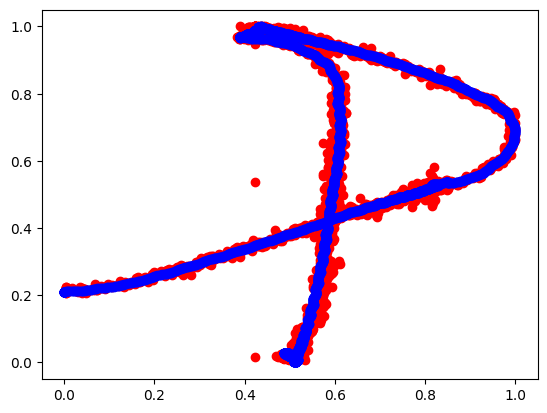

In [27]:
plt.scatter(yhatX, yhatY, color='red')
plt.scatter(Xtargets, Ytargets, color='blue')
#plt.scatter(x_odom, y_odom, color='orange')
plt.show()

In [ ]:
model.save('C:/Users/Ahmed/Desktop/MLP-TCN/ModelX')

In [ ]:
Ymodel.save('C:/Users/Ahmed/Desktop/MLP-TCN/ModelY')